In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import tensorflow as tf

In [3]:
# df = pd.read_csv("../input/data.csv", sep = ",")
# test_df = pd.read_csv("../input/test.csv", sep = ",")

In [4]:
df["Prediction"] = df["Prediction"].apply(lambda x : 1 if x == "print" else 0)
# test_df["Prediction"] = test_df["Prediction"].apply(lambda x : 1 if x == "print" else 0)

In [2]:
df = pd.read_csv("../input/train.csv", sep = ",")
df.head()

,Received_msg,Prediction
0,"Hi, I want to print doc1 which contains 1800 p...",print
1,"Hi, print me doc2 which contains 4500 pages",print
2,What time is it?,other
3,Printing doc3 4500 pages,print
4,Impress my document doc4 at 1800 pages,print


In [5]:
df.tail()

,Received_msg,Prediction
85,"Trump supporters, how do you feel about the wa...",0
86,Why are we worried about others' opinions?,0
87,How do you potty train a 4 months Pitbull?,0
88,"If I jump rope for five minutes, how many calo...",0
89,Which online test series is best for GATE 2017...,0


In [6]:
max_words = 1000
max_len = 100
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(df.Received_msg)
sequences = tok.texts_to_sequences(df.Received_msg)
sequences_matrix = sequence.pad_sequences(sequences,maxlen = max_len)

In [20]:
sequences

[[8, 25, 60, 12, 2, 61, 16, 33, 34, 1],
 [8, 2, 5, 35, 16, 33, 20, 1],
 [17, 62, 26, 36],
 [27, 28, 20, 1],
 [3, 14, 7, 37, 63, 34, 1],
 [64, 65],
 [66, 17, 9, 4, 38],
 [6, 4, 67, 5],
 [68, 6, 4, 69, 27],
 [2, 5, 39, 7, 70],
 [21, 3, 71, 72, 1],
 [8, 2, 73, 7, 74, 75, 1],
 [76, 40],
 [77, 78],
 [2, 79, 80, 1],
 [3, 14, 7, 16, 81, 82, 1],
 [41, 26, 22, 83, 84],
 [6, 4, 85, 12, 86],
 [23, 4, 42, 2, 13, 7],
 [15, 4, 3, 13, 7, 29, 5],
 [3, 5, 87, 88, 89, 16, 90, 20, 1, 43, 91],
 [9, 4, 92, 12, 3],
 [15, 4, 18, 5, 13, 93, 12, 2, 94],
 [18, 5, 14, 95],
 [96, 5, 28, 44, 1],
 [3, 97, 1, 98],
 [27, 45, 99, 1],
 [100, 5, 101, 102, 1],
 [6, 10, 3, 46, 1],
 [19, 3, 47, 103, 1],
 [4, 6, 10, 2, 7, 48, 1],
 [4, 3, 12, 5, 104, 105, 1],
 [17, 13, 106, 49],
 [23, 4, 42, 107, 13, 7, 50, 44, 1],
 [6, 4, 3, 108],
 [4, 23, 12, 2, 5, 109, 110, 1],
 [2, 30, 111, 1],
 [15, 4, 2, 5, 51, 112, 1, 113],
 [3, 14, 7, 114, 115, 31],
 [2, 5, 14, 52, 116, 32],
 [3, 22, 117, 118, 31],
 [21, 3, 119, 50, 53, 32],
 [3, 120

In [7]:
tok_ = Tokenizer(num_words = max_words)
tok_.fit_on_texts(test_df.Received_msg)
sequences_test = tok_.texts_to_sequences(test_df.Received_msg)
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen = max_len)

NameError: name 'test_df' is not defined

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0)

In [17]:
!pip install graphviz

In [18]:
from keras.utils.vis_utils import plot_model
import pydot
import graphviz

In [19]:
inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(256)(layer)
layer = Dropout(0.5)(layer)
layer = Dense(512,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(256,name='FC2')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(128,name='FC3')(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

model.summary()
model.compile(loss = "binary_crossentropy", optimizer = "Adam" , metrics = ["accuracy"])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Model: &quot;model_6&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 100)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
FC1 (Dense)                  (None, 512)               131584    
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)         

In [12]:
history = model.fit(sequences_matrix,df.Prediction,batch_size=16,epochs=50,validation_split=0.25,call

Epoch 1/50
5/5 [==============================] - 3s 590ms/step - loss: 0.6933 - accuracy: 0.5522 - val_loss: 0.6969 - val_accuracy: 0.3043
Epoch 2/50
5/5 [==============================] - 1s 249ms/step - loss: 0.6937 - accuracy: 0.5224 - val_loss: 0.6915 - val_accuracy: 0.6522
Epoch 3/50
5/5 [==============================] - 1s 254ms/step - loss: 0.6881 - accuracy: 0.5672 - val_loss: 0.6811 - val_accuracy: 0.6957
Epoch 4/50
5/5 [==============================] - 1s 254ms/step - loss: 0.6919 - accuracy: 0.5224 - val_loss: 0.6608 - val_accuracy: 0.6957
Epoch 5/50
5/5 [==============================] - 1s 249ms/step - loss: 0.6943 - accuracy: 0.4925 - val_loss: 0.6702 - val_accuracy: 0.6957
Epoch 6/50
5/5 [==============================] - 1s 274ms/step - loss: 0.6684 - accuracy: 0.6716 - val_loss: 0.6603 - val_accuracy: 0.6957
Epoch 7/50
5/5 [==============================] - 1s 267ms/step - loss: 0.6584 - accuracy: 0.5821 - val_loss: 0.6005 - val_accuracy: 0.6957
Epoch 8/50
5/5 [====

In [12]:
import keras.models
model.save("lstm_dnn")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: lstm_dnn/assets


In [14]:
tok_ = Tokenizer(num_words = max_words)
tok_.fit_on_texts("Hi, print me doc43 453 pages")
sequences_test = tok_.texts_to_sequences("Hi, print me doc43 453 pages")
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen = max_len)
print(model.predict(sequences_matrix_test))

[[1.1132529e-06]
 [5.2442807e-01]
 [2.0856669e-05]
 [2.0856669e-05]
 [1.8921494e-04]
 [2.0425400e-06]
 [5.2442807e-01]
 [4.7443532e-06]
 [3.3995015e-08]
 [2.0856669e-05]
 [5.1707984e-06]
 [1.5905797e-03]
 [2.0856669e-05]
 [2.8324127e-04]
 [1.7125226e-08]
 [6.4945221e-04]
 [4.0295720e-04]
 [9.6880984e-05]
 [2.0856669e-05]
 [4.0295720e-04]
 [1.5960502e-06]
 [9.6880984e-05]
 [2.0856669e-05]
 [1.8921494e-04]
 [3.5731082e-07]
 [1.8030405e-04]
 [1.5905797e-03]
 [2.8804088e-05]]


Text(0.5, 1.0, 'Training and Validation Loss')

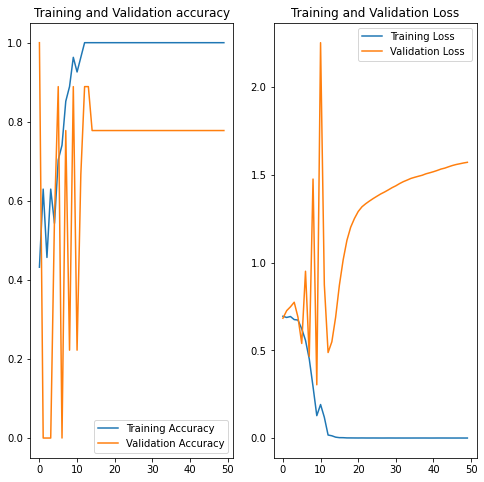

In [10]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epoch_range = range(50)

## Plot Training & Validation Accuracy ## 
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label = "Training Accuracy")
plt.plot(epoch_range,val_acc , label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation accuracy")

## Plot Training & Validation loss ## 
plt.subplot(1,2,2)
plt.plot(epoch_range,loss,label = "Training Loss")
plt.plot(epoch_range,val_loss,label = "Validation Loss ")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")

